# Preprocessing Daily Rainfall Data in DAM Downstream 

### 0. Download Data from HydroShare

In [2]:
from hsclient import HydroShare
import os, shutil

hs = HydroShare()
hs.sign_in()

In [3]:
# Get the resource you want to download using its identifier
res_identifier = '344ff43b686f45b4bde7f7f307556f3a'
res = hs.resource(res_identifier)

# Download the resource as a zipped Bagit file
# Pass in a file path if you want to download to a particular location
res.download()

'344ff43b686f45b4bde7f7f307556f3a.zip'

In [4]:
cwd_path = os.getcwd()
hs_path = os.path.join(cwd_path, res_identifier + ".zip")
shutil.unpack_archive(hs_path, extract_dir=cwd_path)
file_folder = os.path.join(cwd_path, res_identifier, "data/contents")
folder_name = os.listdir(file_folder)[0].split(".")[0]
raw_data = os.path.join(cwd_path, folder_name, "raw_data")
if not os.path.exists(raw_data):
    os.mkdir(os.path.join(cwd_path, folder_name))
    os.mkdir(raw_data)                  
shutil.unpack_archive(os.path.join(file_folder, os.listdir(file_folder)[0]), extract_dir=raw_data)
os.remove(hs_path)
shutil.rmtree(os.path.join(cwd_path, res_identifier))

### 1. Import Required Python Libraries

In [5]:
import pandas as pd
import datetime
from datetime import timedelta
from pylab import rcParams
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
import os
warnings.filterwarnings("ignore")

### 2. Read daily Rainfall data in Dam Downstream

<div class="alert alert-success">
Read Daily Rainfall Data that obtained from DAON database system in K-water </div>

In [6]:
obs_folder_name = "DC_DAM_Downstream"
raw_data_folder = os.path.join(os.getcwd(), obs_folder_name, "raw_data")
os.listdir(raw_data_folder)

['DC_Dam_Operation_Hourly.csv',
 'SJ_Weir_Operation_Daily.csv',
 'DC_Control_Dam_Operation_Daily.csv',
 'DC_DAM_Downstream_WaterLevel_Daily.csv',
 'DC_DAM_Downstream_Rainfall_Daily.csv',
 'DC_Dam_Operation_Daily.csv',
 'DC_Control_Dam_Operation_Hourly.csv',
 'GJ_Weir_Operation_Hourly.csv',
 'GJ_Weir_Operation_Daily.csv',
 'SJ_Weir_Operation_Hourly.csv',
 '1_DC_DAM_Downstream_Rainfall_Observation_Periods.csv',
 'DC_DAM_Downstream_Rainfall_Hourly.csv',
 'DC_DAM_Downstream_WaterLevel_Hourly.csv',
 '1_DC_DAM_Downstream_WaterLevel_Observation_Periods.csv']

In [7]:
all_obs_df = pd.read_csv(os.path.join(raw_data_folder, "DC_DAM_Downstream_Rainfall_Daily.csv"))
all_obs_df.head()

,OBSYMD,RFOBSCD,RF
0,19970317,3014430,NaN
1,19970317,3013440,NaN
2,19970317,3012420,NaN
3,19970317,3012425,NaN
4,19970317,3012445,NaN


<div class="alert alert-success">
Total Rainfall stations in Dam Upstream </div>

In [8]:
all_obs_code = all_obs_df["RFOBSCD"].unique()
all_obs_code

array([3014430, 3013440, 3012420, 3012425, 3012445, 3012430, 3011430,
       3011410, 3203440, 3012435, 3014410, 3012450, 3011460, 3014420,
       3010410, 3012440, 3013420, 3011420, 3011450, 3008460, 3011440,
       3009410, 3012405, 3011470, 3012410, 8000636, 8000648, 8000629,
       9000194, 3013410, 1004428, 8000618, 8000131, 9000038, 9000191,
       8000641, 3011476, 9000121, 8000496, 8000615, 3011474, 3011484,
       3011480, 1101424, 9000079, 3012452, 1101422, 9000017, 3012458,
       3011478, 3013430, 9000190, 3011482, 9000117, 8000642, 8000611,
       8000691, 8000133, 8000763, 8000239])

### 3. Set Rainfall stations considering data observation periods

<div class="alert alert-success">
In Dam Upstream Rainfall stations, we selected the stations with an more than 24 years observation periods. </div>

In [9]:
obs_periods_df = pd.read_csv(os.path.join(raw_data_folder, "1_DC_DAM_Downstream_Rainfall_Observation_Periods.csv"))
obs_periods_df.head()

,RFOBSCD,MAX(OBSDH),MIN(OBSDH),START_YEAR,END_YEAR,PERIODS(YEARS)
0,1004428,2024011709,1990090901,1990,2024,34
1,1101422,2024011709,2002111401,2002,2024,22
2,1101424,2024011709,2002111401,2002,2024,22
3,3008460,2024011709,1995060101,1995,2024,29
4,3009410,2024011709,1995060101,1995,2024,29


In [11]:
code_select = obs_periods_df[obs_periods_df['PERIODS(YEARS)'] >= 24]
code_select

,RFOBSCD,MAX(OBSDH),MIN(OBSDH),START_YEAR,END_YEAR,PERIODS(YEARS)
0,1004428,2024011709,1990090901,1990,2024,34
3,3008460,2024011709,1995060101,1995,2024,29
4,3009410,2024011709,1995060101,1995,2024,29
5,3010410,2024011709,1995060101,1995,2024,29
6,3011410,2024011709,1995060101,1995,2024,29
7,3011420,2024011709,1995060101,1995,2024,29
8,3011430,2024011709,1995060101,1995,2024,29
9,3011440,2024011709,1995060101,1995,2024,29
10,3011450,2024011709,1995060101,1995,2024,29
11,3011460,2024011709,1995060101,1995,2024,29


In [12]:
obs_code = code_select.RFOBSCD.values
obs_code

array([1004428, 3008460, 3009410, 3010410, 3011410, 3011420, 3011430,
       3011440, 3011450, 3011460, 3011470, 3012405, 3012410, 3012420,
       3012425, 3012430, 3012435, 3012440, 3012445, 3012450, 3013410,
       3013420, 3013440, 3014410, 3014420, 3014430, 3203440, 9000017])

### 4. Set Date Data Format and Observation Periods 

<div class="alert alert-success">
Change "date data format" from string to Pandas datetime format </div>

In [13]:
all_obs_df["date"] = pd.to_datetime(all_obs_df["OBSYMD"], format='%Y%m%d')
all_obs_df.head()

,OBSYMD,RFOBSCD,RF,date
0,19970317,3014430,NaN,1997-03-17
1,19970317,3013440,NaN,1997-03-17
2,19970317,3012420,NaN,1997-03-17
3,19970317,3012425,NaN,1997-03-17
4,19970317,3012445,NaN,1997-03-17


<div class="alert alert-success">
Check Observation Periods to create Date Dataframe </div>

In [14]:
all_obs_df["date"].min(), all_obs_df["date"].max()

(Timestamp('1995-06-01 00:00:00'), Timestamp('2024-01-17 00:00:00'))

<div class="alert alert-success">
Create Total Date Periods using Max and Min date above </div>

In [15]:
total_date_df = pd.DataFrame(
    {'date': pd.date_range(start=all_obs_df["date"].min(), end=all_obs_df["date"].max(), freq='1D'),
    }
)
print(len(total_date_df))
total_rf_df = total_date_df
total_date_df.head()

10458


,date
0,1995-06-01
1,1995-06-02
2,1995-06-03
3,1995-06-04
4,1995-06-05


### 5. Preprocessing Daily Data in Dam Upstream

<div class="alert alert-success">
<b> Create Daily Dataframe using station codes as columns </div>

In [16]:
for code in obs_code:
    code_data = all_obs_df[all_obs_df['RFOBSCD'] == code]
    total_df = pd.merge(total_rf_df, code_data, on="date", how="left")
    total_rf_df[str(code)+"_drf"] = total_df["RF"].values
    
total_rf_df_f = total_rf_df.set_index("date")
total_rf_df_f.head()

,1004428_drf,3008460_drf,3009410_drf,3010410_drf,3011410_drf,3011420_drf,3011430_drf,3011440_drf,3011450_drf,3011460_drf,...,3012445_drf,3012450_drf,3013410_drf,3013420_drf,3013440_drf,3014410_drf,3014420_drf,3014430_drf,3203440_drf,9000017_drf
date,,,,,,,,,,,,,,,,,,,,,
1995-06-01,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,...,0.0,0.0,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN
1995-06-02,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,...,0.0,0.0,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN
1995-06-03,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,...,0.0,0.0,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN
1995-06-04,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,...,0.0,0.0,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN
1995-06-05,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,...,0.0,0.0,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN


<div class="alert alert-success">
<b> Select important stations </div>

In [17]:
selected_rf_df_f = total_rf_df_f.loc["2000-10-01":"2023-09-30"]
selected_rf_df_f.head()

,1004428_drf,3008460_drf,3009410_drf,3010410_drf,3011410_drf,3011420_drf,3011430_drf,3011440_drf,3011450_drf,3011460_drf,...,3012445_drf,3012450_drf,3013410_drf,3013420_drf,3013440_drf,3014410_drf,3014420_drf,3014430_drf,3203440_drf,9000017_drf
date,,,,,,,,,,,,,,,,,,,,,
2000-10-01,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2000-10-02,NaN,4.0,0.0,4.0,3.0,4.0,5.0,3.0,3.0,3.0,...,5.0,5.0,9.0,8.0,9.0,9.0,7.0,8.0,7.0,3.0
2000-10-03,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2000-10-04,NaN,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2000-10-05,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<div class="alert alert-success">
Check Missing Data in stations : Sum of number of missing data is printed below. </div>

In [18]:
print(len(selected_rf_df_f[selected_rf_df_f.isna().any(axis=1)]))

1161


<div class="alert alert-success">
Plotting Missing data </div>

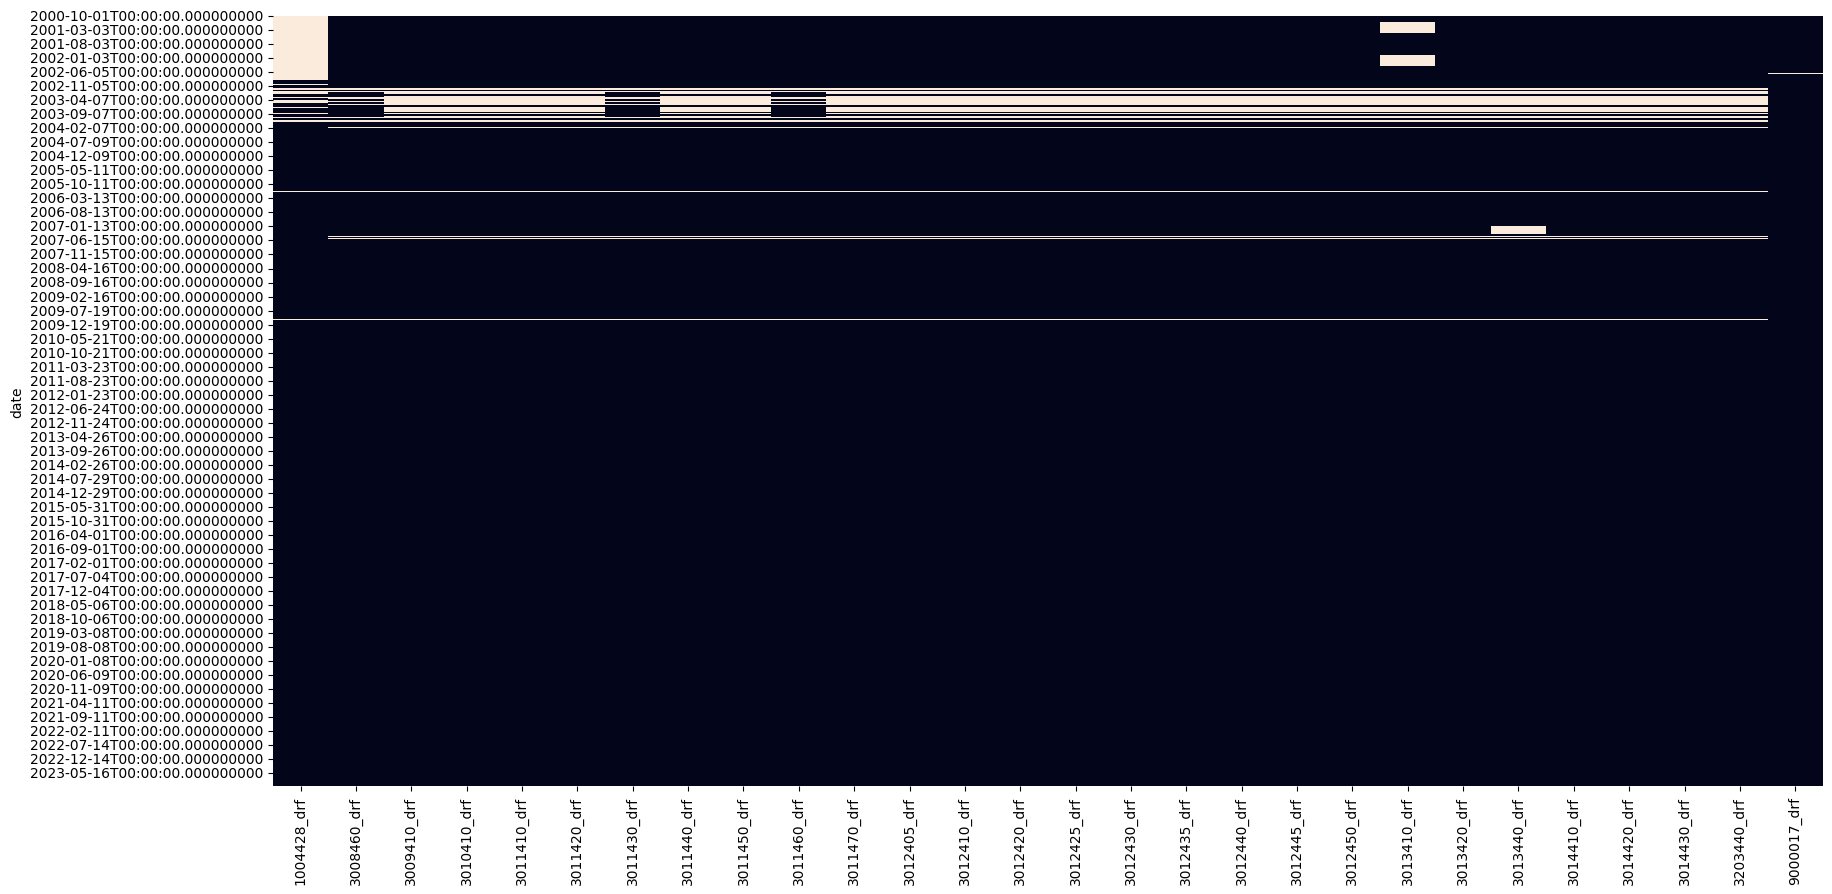

In [19]:
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(selected_rf_df_f.isnull(), cbar=False)
plt.savefig(os.getcwd() + "/" + obs_folder_name + "/rf_dam_upstream_missing_daily.png", bbox_inches='tight')
plt.show()

<div class="alert alert-success">
Plotting Water Level Plot in selected stations </div>

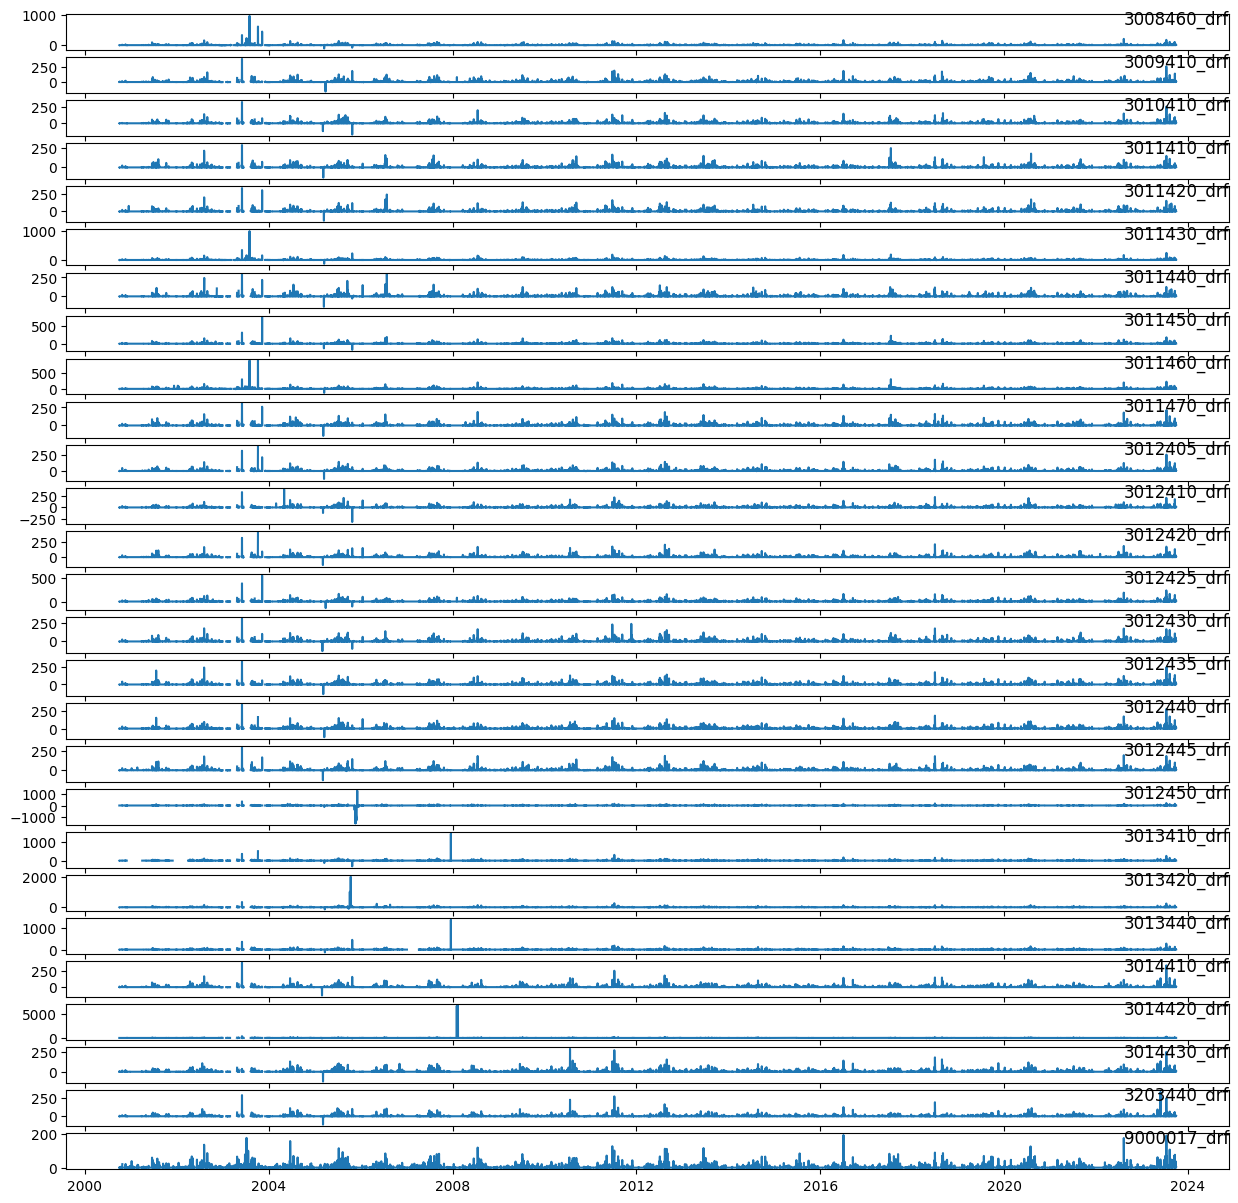

In [20]:
rcParams['figure.figsize'] = 15, 15
values = selected_rf_df_f.values
groups = [*range(1,len(selected_rf_df_f.columns), 1)]
i = 1
# plot each column
for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(selected_rf_df_f.index,  values[:, group])
    plt.title(selected_rf_df_f.columns[group], y=0.5, loc='right')
    i += 1

plt.savefig(os.getcwd() + "/" + obs_folder_name + "/rf_dam_upstream_ts_daily.png", bbox_inches='tight')
plt.show()

<div class="alert alert-success">
Interpolating missing data using Pandas library </div>

In [21]:
selected_rf_df_f_revised = selected_rf_df_f
col_name = list(selected_rf_df_f_revised)
selected_rf_df_f_revised[col_name] = selected_rf_df_f_revised[col_name].interpolate(method="pad")
selected_rf_df_f_revised[selected_rf_df_f_revised.isna().any(axis=1)]

,1004428_drf,3008460_drf,3009410_drf,3010410_drf,3011410_drf,3011420_drf,3011430_drf,3011440_drf,3011450_drf,3011460_drf,...,3012445_drf,3012450_drf,3013410_drf,3013420_drf,3013440_drf,3014410_drf,3014420_drf,3014430_drf,3203440_drf,9000017_drf
date,,,,,,,,,,,,,,,,,,,,,
2000-10-01,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2000-10-02,NaN,4.0,0.0,4.0,3.0,4.0,5.0,3.0,3.0,3.0,...,5.0,5.0,9.0,8.0,9.0,9.0,7.0,8.0,7.0,3.0
2000-10-03,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2000-10-04,NaN,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2000-10-05,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2002-08-26,NaN,0.0,0.0,0.0,1.0,11.0,1.0,3.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2002-08-27,NaN,29.0,10.0,43.0,31.0,36.0,33.0,9.0,24.0,35.0,...,22.0,2.0,36.0,13.0,12.0,45.0,18.0,15.0,6.0,31.0
2002-08-28,NaN,0.0,1.0,0.0,3.0,4.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<div class="alert alert-success">
Check missing data </div>

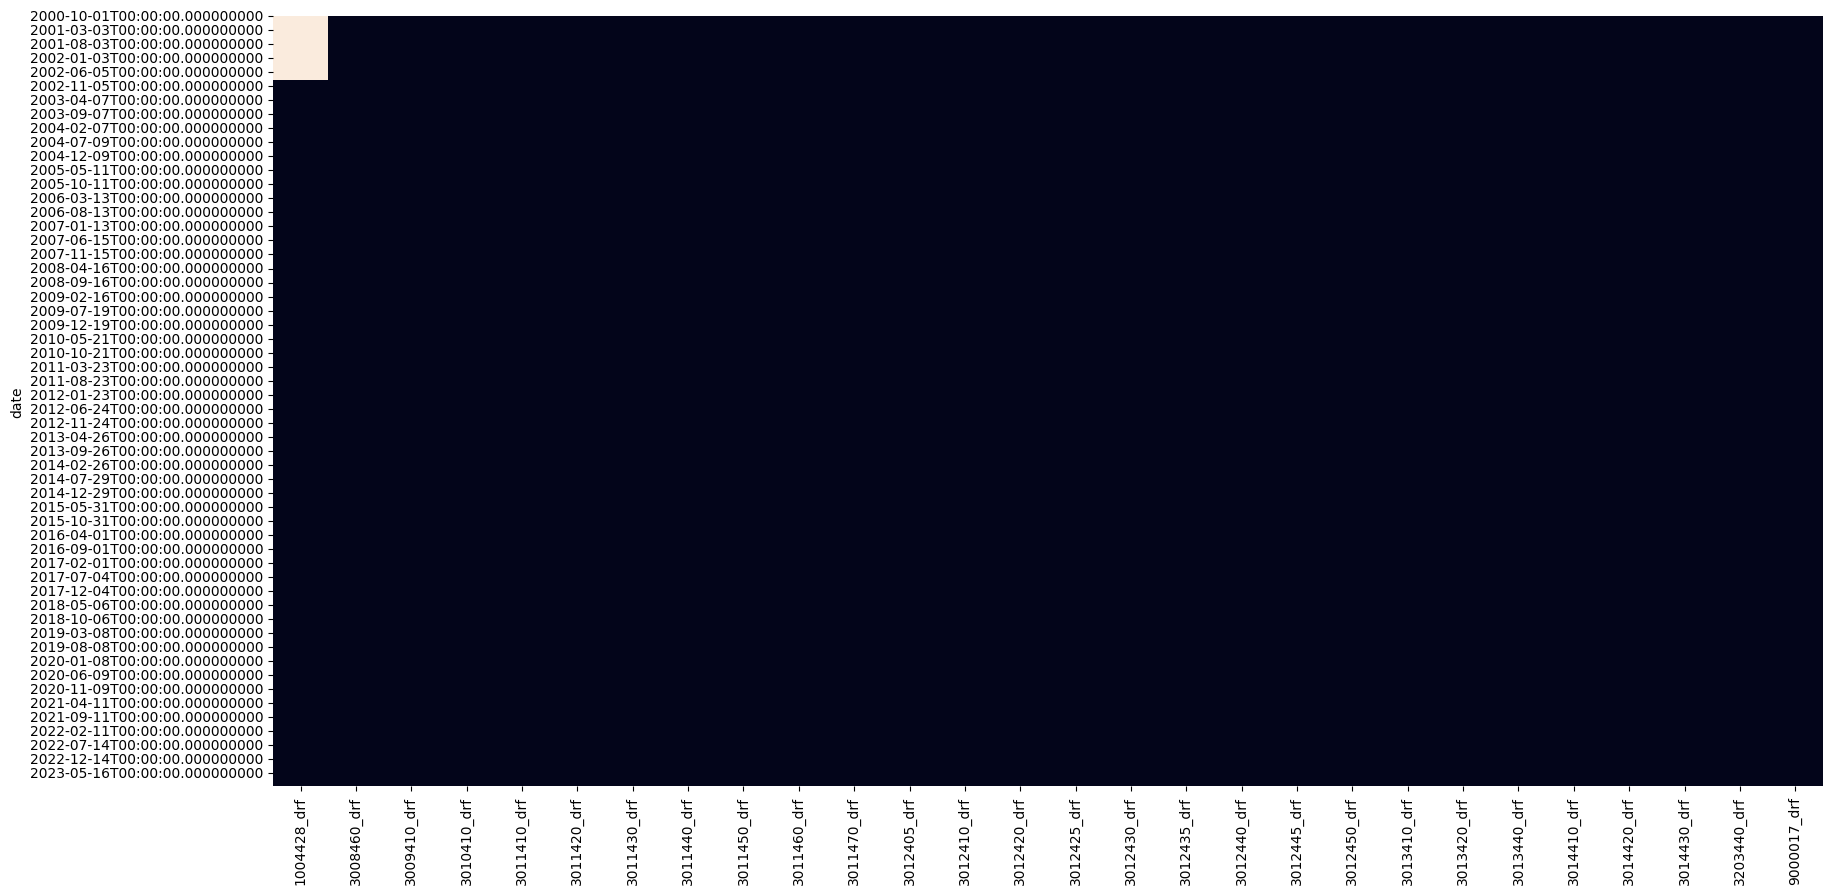

In [22]:
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(selected_rf_df_f_revised.isnull(), cbar=False)
plt.savefig(os.getcwd() + "/" + obs_folder_name + "/rf_upstream_missing_daily_revised.png", bbox_inches='tight')
plt.show()

<div class="alert alert-success">
Plotting Rainfall (that has no missing data) in selected stations </div>

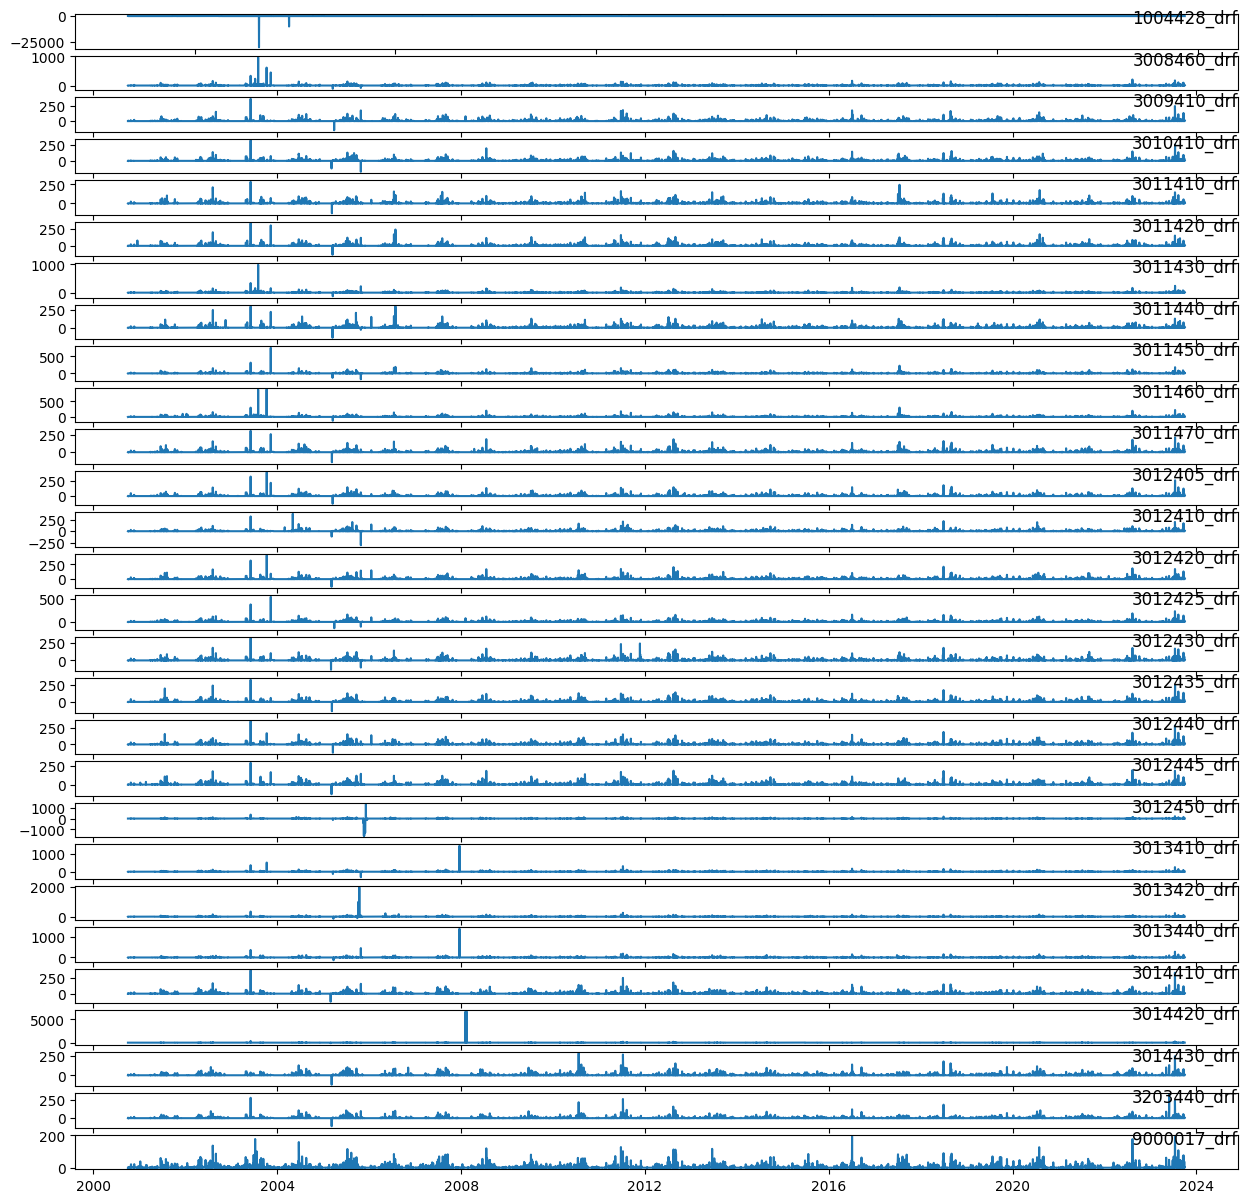

In [23]:
rcParams['figure.figsize'] = 15, 15
values = selected_rf_df_f_revised.values
groups = [*range(0,len(selected_rf_df_f_revised.columns), 1)]
i = 1
# plot each column
for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(selected_rf_df_f_revised.index,  values[:, group])
    plt.title(selected_rf_df_f_revised.columns[group], y=0.5, loc='right')
    i += 1

plt.savefig(os.getcwd() + "/" + obs_folder_name + "/rf_dam_upstream_ts_daily_revised.png", bbox_inches='tight')
plt.show()

### 6. Save Daily Rainfall Data as CSV format

In [24]:
selected_rf_df_f_revised.to_csv(os.getcwd() + "/" + obs_folder_name + "/DC_Dam_Downstream_Rainfall_Daily_f.csv")

### 7. Creating Model Input using observation data